![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import seaborn as sns



In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [4]:
df.shape

(541462, 3)

<Axes: >

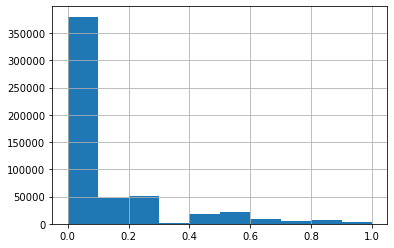

In [20]:
# Impresión histograma de variable de interés (y)
df.target.hist()

Se puede observar que la distribución se encuentra desbalanceada, por lo que se puede decir que la distribución de los comentarios toxicos es muy baja.

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Descripción de la longitud de los comentarios:
count    541462.000000
mean        297.391015
std         269.486412
min           1.000000
25%          94.000000
50%         202.000000
75%         414.000000
max        1737.000000
Name: length, dtype: float64


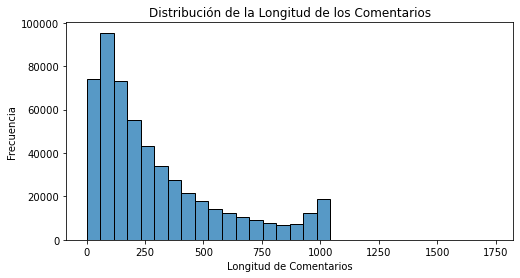

In [19]:
df['length'] = df['comment_text'].str.len()
print("Descripción de la longitud de los comentarios:")
print(df['length'].describe())

plt.figure(figsize=(8, 4))
sns.histplot(df['length'], bins=30)
plt.title('Distribución de la Longitud de los Comentarios')
plt.xlabel('Longitud de Comentarios')
plt.ylabel('Frecuencia')
plt.show()

* La longitud de los comentarios en promedio es de 297 caracteres.
* Hay un total de 541462 comentarios.
*  Hay una variabilidad significativa en la longitud de los comentarios con una desviación estándar de aproximadamente 270 caracteres.
*  La distribución está sesgada hacia la derecha, lo que significa que hay menos comentarios largos, pero estos podrían ser muy extensos.

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 1
vectorizador = CountVectorizer()
x_train_t = vectorizador.fit_transform(X_train)
X_test_t = vectorizador.transform(X_test)

modelo = Ridge(alpha = 0.1)
modelo.fit(x_train_t, y_train)

y_pred = modelo.predict(X_test_t)

mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")


Error Cuadrático Medio (MSE): 0.03165206668054347


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 2
vectorizador_2 = CountVectorizer(ngram_range=(3, 3))
x_train_t_2 = vectorizador.fit_transform(X_train)
X_test_t_2 = vectorizador.transform(X_test)

modelo_2 =  Ridge(alpha=1.0)
modelo_2.fit(x_train_t_2, y_train)

y_pred_2 = modelo.predict(X_test_t_2)

mse_2 = mean_squared_error(y_test, y_pred_2)
print(f"Error Cuadrático Medio (MSE): {mse_2}")


Error Cuadrático Medio (MSE): 0.03165206668054347


Al realizar la comparación con el ejercicio anterior se puede encontrar que el mse es el mismo, por lo que el uso particular de trigramas no mejoró el comportamiento del modelo.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

## TfidfVectorizer
TF-IDF (Frecuencia de término Frecuencia de documento inversa) Es un algoritmo para transformar texto en representación numérica que funciona para modelos de aprendizaje automático. Esta medida ayuda a evaluar la importancia de una palabra dentro de un documento en relación a documentos. 

La función se divide en dos partes: 
* TF: Frecuencia de términos (Term Frequency): Es la frecuencia de un término en un documento en específico, se calcula como la cantidad de veces que un término aparece en el documento divido por el total de términos que tiene el documento.
* IDF: Frecuencia inversa de documento (Inverse Document Frequency): Ayuda a disminuir el peso de los términos que se repiten mucho y aumenta el peso de los términos que no aparecen frecuentemente. Se calcula como el logaritmo del número total de documentos dividido por el número de documentos que contienen el término.

### Ventajas:
* Debido a que ayuda a darle un menor peso a las palabras más comunes y un mayor peso a las palabras únicas se mejora la precisión de la clasificación.
* Ayuda a identificar las palabras diferentes en el documento, se diferencia en que no solo realiza el conteo de las palabras, sino que considera el valor único del término en el documento.

### Desventajas:
* El algoritmo suele ser más pesado debido a que a diferencia de CountVectorizer que solo cuenta la presencia de los términos
* Riesgo en perdida de la información debido a que el algoritmo discrimina las palabras más comunes.



## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 4
tfi_vector = TfidfVectorizer()
X_train_tf = tfi_vector.fit_transform(X_train)
X_test_tf = tfi_vector.transform(X_test)

modelo_3 = Ridge(alpha=1.0)
modelo_3.fit(X_train_tf, y_train)

y_pred_3 = modelo_3.predict(X_test_tf)
mse_3 = mean_squared_error(y_test, y_pred_3)
print("MSE:", mse_3)


MSE: 0.018051279772916436


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

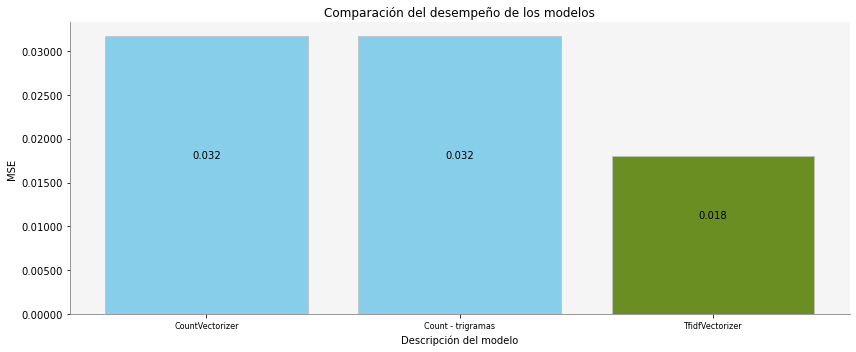

In [14]:
# Celda 5
def compararModelos(models, data, score):
    better = min(data)
    colores = ['#87CEEB' if value != better else '#6B8E23' for value in data]
    fig, ax = plt.subplots(figsize=(12,5))
    bar = ax.bar(models, data, linewidth=0.8, color=colores, edgecolor="silver")
    ax.set_title("Comparación del desempeño de los modelos")
    ax.set_xlabel("Descripción del modelo")
    ax.set_ylabel(score)
    bar_labels = [f'{value:.3f}' for value in data] 
    ax.bar_label(bar, bar_labels, label_type='center', padding=20)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor("whitesmoke")
    ax.spines["left"].set_color("gray")
    ax.spines["bottom"].set_color("gray")
    ax.tick_params(axis='x', labelsize=8)
    plt.gca().yaxis.set_major_formatter('{:,.5f}'.format)
    plt.tight_layout()
    plt.show()

modelos = ["CountVectorizer", "Count - trigramas","TfidfVectorizer"]
mses = [mse,mse_2,mse_3]

compararModelos(modelos, mses, "MSE")

### Resultados: 

Al usar el efecto de los trigramas se pudo observar que no hubo una mejora en el desempeño del modelo, lo que puede indicar que la mayor parte de los patrones de toxicidad en los comentarios se pueden caputar sin tener que tomar secuencias mas largas de las palabras.

Al comparar los tres modelos se puede observar que para TfidfVectorizer se dió una mejora altamente significativa en comparación con la función CountVectorizer de unigramas y trigramas. Con esto se concluye que la toxicidad en comentarios está más presente por palabras menos frecuentes pero con un significado bastante alto.

